# Environment Set-up

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from utils.person_segmentation import yolo_detection, quick_mask, fine_mask
from utils.misc import to_PIL_image, to_PIL_mask, to_masked_image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from ultralytics import YOLO
from segment_anything import SamPredictor, sam_model_registry
from diffusers import StableDiffusionInpaintPipeline
from transformers import pipeline

C:\Users\admin\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Model Instantiation

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
yolov8_model = YOLO('./model_ckpt/yolov8x.pt') # YOLOv8 instantiation

In [5]:
model_type = "vit_h"
sam_checkpoint = "./model_ckpt/sam_vit_h_4b8939.pth"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
sam_model = SamPredictor(sam) # SAM predictor instantiation

In [6]:
caption_model = pipeline("image-to-text",model="ydshieh/vit-gpt2-coco-en")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
C:\Users\admin\.conda\envs\pytorch\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [7]:
inpaint_model = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    revision="fp16",
    torch_dtype=torch.float16
).to(device) # Stable Diffusion pipeline instantiation

C:\Users\admin\.conda\envs\pytorch\lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


# Person Romoval


0: 448x640 4 persons, 150.8ms
Speed: 5.0ms preprocess, 150.8ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
C:\Users\admin\.conda\envs\pytorch\lib\site-packages\transformers\generation\utils.py:1288: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
100%|██████████| 50/50 [00:15<00:00,  3.28it/s]


['background', 'empty', 'two', 'old', 'boxes', 'sitting', 'side', 'road']


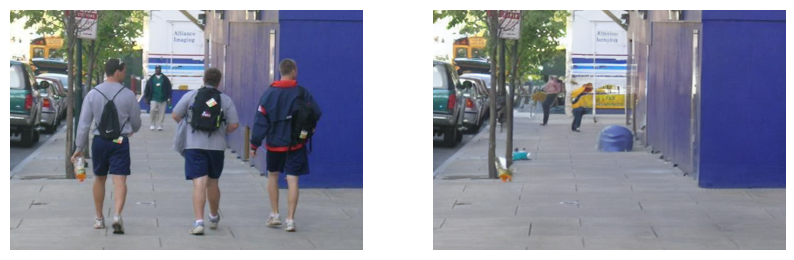


0: 640x576 2 persons, 162.2ms
Speed: 2.0ms preprocess, 162.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
100%|██████████| 50/50 [00:13<00:00,  3.59it/s]


['background', 'empty', 'bench', 'park', 'large', 'brick', 'wall']


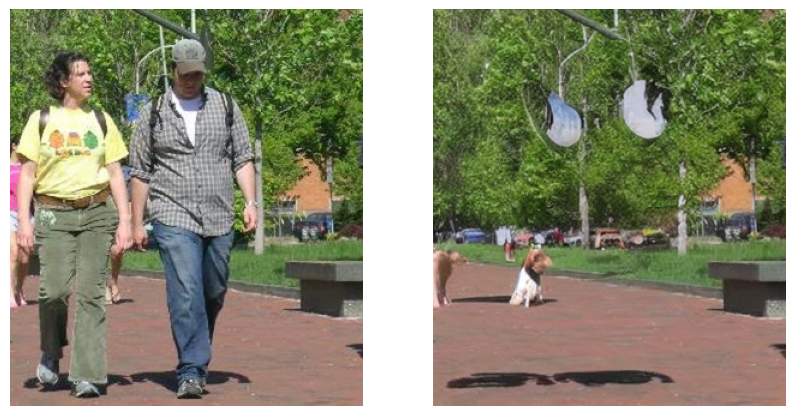


0: 480x640 8 persons, 1 handbag, 152.6ms
Speed: 2.0ms preprocess, 152.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
100%|██████████| 50/50 [00:10<00:00,  4.55it/s]


['background', 'empty', 'white', 'refrigerator', 'sign']


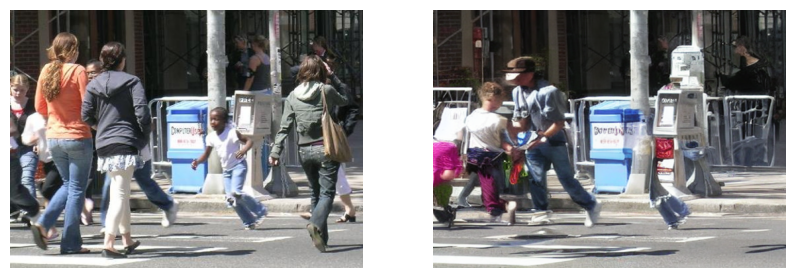


0: 544x640 1 person, 176.5ms
Speed: 3.0ms preprocess, 176.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
100%|██████████| 50/50 [00:15<00:00,  3.25it/s]


['background', 'empty', 'white', 'green', 'fire', 'hydrant', 'sitting', 'sidewalk']


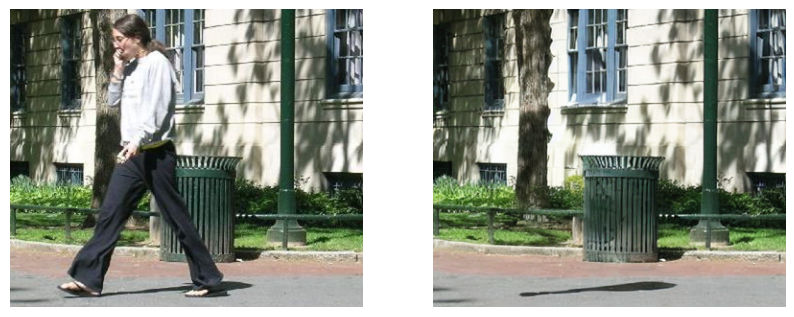


0: 384x640 8 persons, 4 handbags, 160.2ms
Speed: 3.0ms preprocess, 160.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
100%|██████████| 50/50 [00:12<00:00,  3.90it/s]


['background', 'empty', 'row', 'parking', 'meters', 'sidewalk']


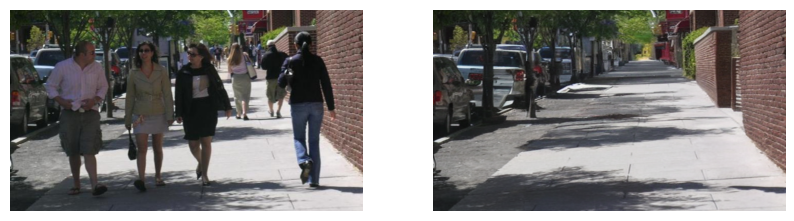


0: 576x640 1 person, 1 handbag, 148.0ms
Speed: 3.0ms preprocess, 148.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
100%|██████████| 50/50 [00:14<00:00,  3.55it/s]


['background', 'empty', 'bird', 'standing', 'sidewalk', 'near', 'building']


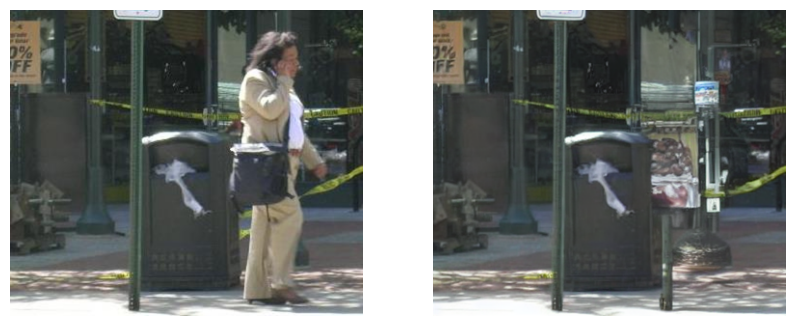


0: 576x640 2 persons, 24.9ms
Speed: 3.0ms preprocess, 24.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
100%|██████████| 50/50 [00:12<00:00,  3.91it/s]


['background', 'empty', 'two', 'white', 'poles', 'sidewalk']


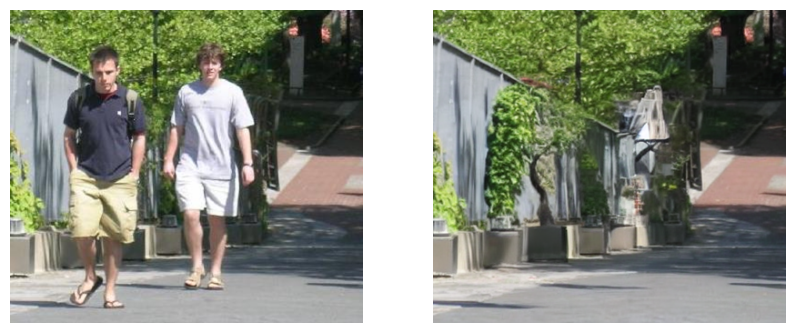


0: 480x640 3 persons, 2 handbags, 21.9ms
Speed: 3.0ms preprocess, 21.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
100%|██████████| 50/50 [00:15<00:00,  3.21it/s]


['background', 'empty', 'yellow', 'green', 'fire', 'hydrant', 'sitting', 'sidewalk']


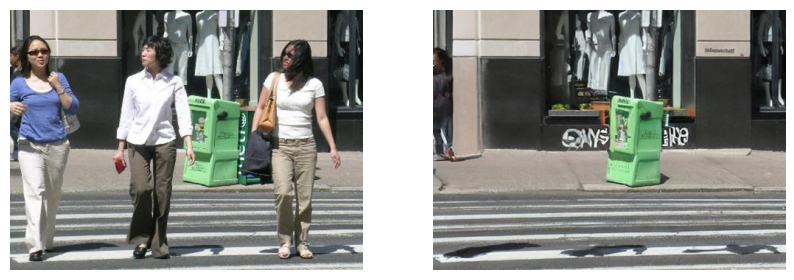


0: 576x640 6 persons, 24.0ms
Speed: 3.0ms preprocess, 24.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
100%|██████████| 50/50 [00:12<00:00,  3.92it/s]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


['background', 'empty', 'row', 'wooden', 'benches', 'bicycle']


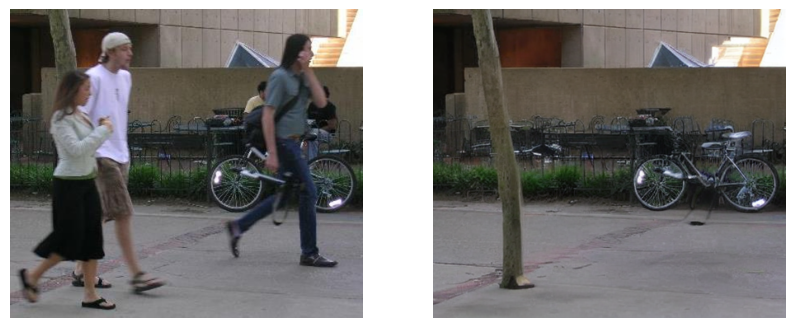


0: 416x640 5 persons, 2 handbags, 172.5ms
Speed: 2.0ms preprocess, 172.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
100%|██████████| 50/50 [00:15<00:00,  3.22it/s]


['background', 'empty', 'white', 'door', 'black', 'door', 'black', 'wall']


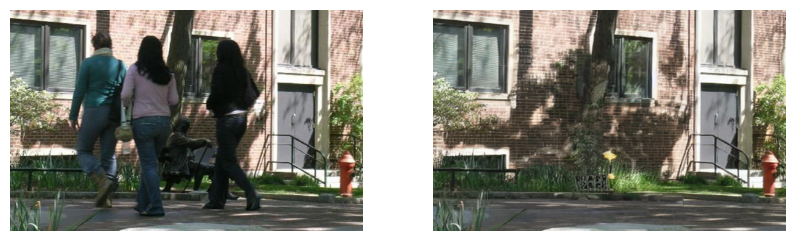

In [8]:
idx = np.arange(1,97)
np.random.shuffle(idx)
for i in idx[0:10]:
    image_path = 'PennFudanPed/PNGImages/PennPed'+str(i).zfill(5)+'.png'
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    # detection
    person_boxes = yolo_detection(yolov8_model, image)
    f_mask = fine_mask(sam_model, image, person_boxes)
    # transform image to PIL
    image_PIL, original_size = to_PIL_image(image)
    # transform mask to PIL
    mask_PIL = to_PIL_mask(image, f_mask)
    # create masked image
    masked_image = to_masked_image(image, person_boxes)
    # caption (with masked_image_PIL)
    caption = caption_model(masked_image)[0]['generated_text']
    stop_words = set(nltk.corpus.stopwords.words('english'))
    caption = nltk.tokenize.word_tokenize(caption)
    filtered_caption = ['background', 'empty']
    for word in caption:
        if word not in stop_words:
            filtered_caption.append(word)
    # inpainting (image_PIL, mask_PIL)
    inpainted_image = inpaint_model(
        prompt=filtered_caption,
        image=image_PIL,
        mask_image=mask_PIL
    ).images[0]
    # show images
    print(filtered_caption)
    plt.figure(figsize=(10,6))
    plt.subplot(1, 2, 1)
    plt.imshow(image_PIL.resize(original_size))
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(inpainted_image.resize(original_size))
    plt.axis("off")
    plt.show()